# Data Mining - Handin 2 - Graph mining

This handin corresponds to the topics in Week 11-15 in the course.

The handin is 
* done in groups
* worth 10% of the grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is **100**. For the maximum grade you need to get at least _90 points_. The minimum grade (02 in the Danish scale)
requires **at least** 33 points, with at least 9 points from the first three Parts (Part 1,2,3) and 6 points in the last part (Part 4).
Good luck!

**The exercise types**: There are four different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-5 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
4. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). **However**, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient!

**Q&A**

Q: If the task is to implement a mean function, may I just call ```np.mean()```? 
<br>A: No.

Q: If the task is to compare the mean of X and Y, may I use ```np.mean()``` to calculate the mean?
<br>A: Yes.

Q: If I have implemented a mean function in a previous task, but I am unsure of its correctness, may I use ```np.mean()``` in following task where mean is used as a helper function? 
<br>A: Yes.

Q: May I use ```np.mean()``` to debug my implementation of mean?
<br>A: Yes.

Q: Do I get 0 points for a task if I skip it?
<br>A: Yes.

Q: Can I get partial points for a task I did partially correct?
<br>A: Yes.

Q: Is it OK to skip a task if I do not need the points from it?
<br>A: Yes.

Q: Should I inform a TA if I find an error?
<br>A: Yes.

Q: Should I ask questions if I am confused?
<br>A: Yes.



Good luck!

<span style="color:red">New packages have been added to "requirements.yml". To install them, go to the root of the repository and run:
```
conda activate dm25
conda env update -f requirements.yml --prune
```
</span>

<span style="color:red">or install them manually:
```
pip install networkx
pip install torch
pip install torchvision
```
</span>



In [30]:
### BEGIN IMPORTS - DO NOT TOUCH!
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import sys
sys.path.append('..')
#!{sys.executable} -m pip install networkx
#!{sys.executable} -m pip install torch
#!{sys.executable} -m pip install torchvision
import random
import scipy.io as sio
import time

import networkx as nx
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import csv
from itertools import count


import torch
import torch.optim
import torch.nn as nn
import torch.nn.functional as F
import pickle

### END IMPORTS - DO NOT TOUCH!

## Task 1.1 Random walks and PageRank  (10 points)

In this exercise recall that the PageRank is defined as 
$$\mathbf{r} = \alpha \mathbf{Mr} + (1-\alpha)\mathbf{p}$$ 
where $\mathbf{r}\in \mathbb{R}^n$ is the PageRank vector, $\alpha$ is the restart probability, $\mathbf{M} = A\Delta^{-1}$, and $\mathbf{p}$ is the restart (or personalization) vector. 

### Task 1.1.1 (2 points)
What is the PageRank of a **$d$-regular** graph with $n$ nodes and $\alpha=1$? 

<span style='color: green'>**\[Motivate\]**</span> your answer without showing the exact computation. 

****
<span style="color:red">**YOUR ANSWER HERE**</span>

## Answer task 1.1.1

Given that alpha is equal to 1, we can observe that the page rank formula becomes  $r = Mr$.
We do know that each node has exactly the same number of neighbors, given that that's the definiton of a d-regular graph. Having all nodes share the same numbers of neighbors means that the probability of reaching each node is equal for all nodes, therefore their importance is equally distributed, meaning that the PageRank  of this graph is of [$\frac{1}{n}$, $\frac{1}{n}$, ... , $\frac{1}{n}$]. 

****

### Task 1.1.2 (6 points)
Look at the graph below (run the code) and try to make a guess about the PageRank values of each node by only looking at the graph.

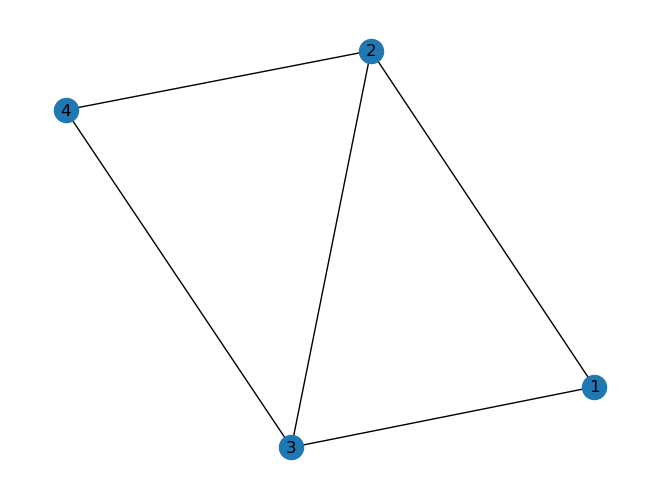

In [31]:
G = nx.Graph()
G.add_edges_from([(1,2),(2,3), (2,4), (3,4), (1,3)])
nx.draw(G, with_labels=True, )

<span style='color: green'>**A) \[Implement\]**</span> the PageRank for $\alpha=1$ for the graph using the Power Iteration method (use $\epsilon=1e-16$ to stop the iteration).<br> 

<span style='color: green'>**B) \[Implement]**</span> Plot the norm square difference of the $r$ vector between two iterations. 

<span style='color: green'>**C) \[Motivate\]**</span> Do you observe a constanct decrease of the norm square difference as iterations are increasing, and is it expected or not?

<span style='color: green'>**D) \[Implement\]**</span> the PageRank for $\alpha=1$ using the eigenvector method.<br> 

<span style='color: green'>**E) \[Motivate\]**</span> Are solutions of both methods the same? Why don't we only use the eigenvector method that optimally solves the problem? 

<span style='color: green'>**F) \[Motivate\]**</span> Do the real eigenvalues match with your first guess? Can you see a pattern between the eigenvalues of each node and its edges?   

In [32]:
#A) YOUR CODE HERE 
def my_pagerank(G, alpha=1, p=None, max_iter=100, tol=1e-06):
    A = nx.adjacency_matrix(G).astype(float).todense()
    n = G.number_of_nodes()
    r = np.full(n, 1/n)

    if p is None:
        p = np.full(n, 1/n)

    Deg_Matrix = np.sum(A, axis=1).flatten()
    Deg_Matrix[Deg_Matrix == 0] = 1
    M = (A / Deg_Matrix[:, None]).T  

    norm_square_difference_list = []
    for _ in range(max_iter):
        new_r = alpha * M @ r + (1 - alpha) * p
        norm_square = np.linalg.norm(new_r - r) ** 2
        norm_square_difference_list.append(norm_square)
        if np.allclose(new_r, r, atol=tol):
            break
        r = new_r

    return r, norm_square_difference_list


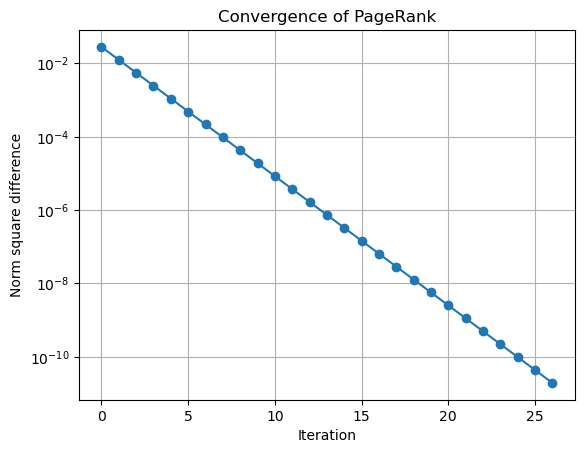

In [33]:
#B) YOUR CODE HERE 
def plot_covergence(norm_square_difference_list):
    plt.plot(norm_square_difference_list, label='Norm square difference', marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Norm square difference')
    plt.yscale("log")
    plt.title('Convergence of PageRank')
    plt.grid(True)
    plt.show()


r, norm_diff = my_pagerank(G)
plot_covergence(norm_diff)

    

<span style="color:red"> C) YOUR ANSWER HERE</span>

***
The decrease is continously logaritmic. This is due to the iterative repeating multiplication of M for each termporal r. The matrix M represents the eigenvalues, having the value less than 1, meaning exponential decrease per iteration, therefore the difference between the current value of r and the next iteration r+1 is exponentially decreasing, therefore you see a contionus decreasing given the y axis being logaritmic. 
***


In [34]:
#D) YOUR CODE HERE

def eigenvectorPageRank(G, alpha=1, p=None,  max_iter=100, tol=1e-06):
    A = nx.adjacency_matrix(G).astype(float).todense()
    n = G.number_of_nodes()

    if p is None:
        p = np.full(n, 1/n)

    Deg_Matrix = np.sum(A, axis=1).flatten()
    Deg_Matrix[Deg_Matrix == 0] = 1
    M = (A / Deg_Matrix[:, None]).T

    G_matrix = alpha * M + (1 - alpha) * p[:, None]

    eigvals, eigvecs = np.linalg.eig(G_matrix)

    idx = np.argmax(np.abs(eigvals))

    dominant_eigvec = np.abs(eigvecs[:, idx]).flatten()

    pagerank_vector = dominant_eigvec / np.sum(dominant_eigvec)


    return pagerank_vector, eigvals, eigvecs



pageRank_vector, eigvals, eigvecs = eigenvectorPageRank(G)
differences = np.abs(r - pageRank_vector)
print("Differences between power iteration and eigenvector method: ", differences)
print()
print("Eigvals of the matrix: ", eigvals)
print("Eigvectors of the matrix: ", eigvecs)




Differences between power iteration and eigenvector method:  [1.32007093e-06 1.32007093e-06 1.32007093e-06 1.32007093e-06]

Eigvals of the matrix:  [ 1.00000000e+00  5.20196814e-17 -6.66666667e-01 -3.33333333e-01]
Eigvectors of the matrix:  [[-3.92232270e-01 -7.07106781e-01  5.00000000e-01  2.22408540e-16]
 [-5.88348405e-01  1.56737938e-16 -5.00000000e-01 -7.07106781e-01]
 [-5.88348405e-01 -1.06938592e-16 -5.00000000e-01  7.07106781e-01]
 [-3.92232270e-01  7.07106781e-01  5.00000000e-01 -8.51755812e-17]]


<span style="color:red"> E) YOUR ANSWER HERE</span>

***
The solutions, as seen in the difference variable being printed out, are relatively the same, very similar, therefore the problem is not the result, but more about the procedure in order to get the result. The eigenvector method  requires to compute all the eigenvalues and eigenvectors of a  matrix, therefore approx a O(n^3) time complexity, much more less efficient than the Power method, especially given complex graphs. 
Another problem, also pointed in the chapter 5 of the MMD book, is that the matrix M can be very sparse, and the eigenvector decomposition converts it into a dense format, a lot of computational power extra required for such task. 
***

<span style="color:red"> F) YOUR ANSWER HERE</span>

***
Well, 
***

### Task 1.1.3 (2 points)

<span style='color: green'>**\[Motivate\]**</span> Assume you have embedded the graph in **1.1.2** with a __Linear Embedding__ using unnormalized Laplacian matrix of the graph as the similarity matrix. How do you expect the embeddings to be if the embedding dimension is $d = 1$? 

* [ ] Nodes 1, 2, 3, 4 will be placed in the corners of a hypercube
* [X] Nodes 2,3 will have the same embedding while 1,4 will be far from each other.
* [ ] Nodes 1,4 have the same embedding and 2,3 will have very close embeddings.
* [ ] Nodes 3,4 will be very far apart.

****
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

***
Well, we observe the initial graph and observe that node 1 and 4 have two connections, degree of 2, whereas 2 and 3 have degree of 3. Regarding adjacency, we observe that both 2 and 3 have connections to ALL nodes, whereas 1 and 4 have connection to 2 and 3, no connections between each other. Regarding the missing connectivity between 1 and 4, while 2, 3 are connected to all nodes, the correct answer is> " Nodes 2,3 will have the same embedding while 1,4 will be far from each other."

***

## Task 1.2: Spectral Properties of the Graph Laplacian (10 points)
 <span style='color: green'>**\[Prove\]**</span> **the following properties:**
 You will be given points for each of the properties that you prove, rather than points for the exercise as a whole.

**Note that all question correspond to the eigenvalues of the LAPLACIAN (NOT THE NORMALIZED)**

For a graph with $n$ nodes the eigenvalues of the LAPLACIAN ($L  = D - A$) is noted as:<br>
**$\lambda_0\leq\lambda_1\leq...\leq\lambda_{n-1}$**

### Task 1.2.1 (2 points)

For all graphs $\lambda_0 = 0$ 

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

***
We know per theorem that all eigenvalues are greater than 0, therefore we know that $\lambda_{0} \geq 0$.  Well, we know that, for any graph, no matter the graph, there exists a eigenvalue having the value 0, due to eigenvectors such as the eigenvector 1.  
More concrete, given formula $L \cdot x = \lambda \cdot  x$, where x is eigenvector, $\lambda$ being eigenvalue and L being the Laplacian. So, given $x = 1$, we have:  $\lambda = L \cdot 1 = 0$, due to having the nodes degree added with the negative value of -1 per edge connection for nodes, add because the adjacency added togheter per node is equivalent with the degree of that specific node, you get 0, having $\lambda = 0$ if $x=1$, and since 0 is the absolute smallest value of en eigenvalue and the smallest eigenvalue is $\lambda_{0}$, we know $\lambda_{0} = 0 $
***

### Task 1.2.2 (2 points)
For the complete graph, $\lambda_1, \dots, \lambda_{n-1} = n$

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

***
Let's first analyse and understand what a complete graph is that when all nodes are connected with each other, meaning that the matrix L = D - A  will have it's diagonal equal to the degree, while the rest of the entries are all equal to one. The diagonal equal to the degree, given a complete graph, is n-1 (not include yourself).  Let's first look at the classic eigenvalue equation: $Lx = \lambda{x}$. Regarding the previous proof for $\lambda_{0} = 0$ where the eigenvector is $[111...11]^{T}$, we need a vector being orthogonal to the 1 vector in order to respect the eigenvalue equation. Orthogonality means that the dot product between our vector $[x_{1}x_{2}...x_{n}]^{T}$ and $[111...11]^{T}$ should be 0. The only possibility for our vector to be 0 is that $\sum_{i} x_{i}=0$. 

Let's define $z = Lx$, where $z = \lambda x$. Well, given the value z, for the i'th entry is equal to i'th row of L with y. Well, we know that the diagonal  is (n-1), the i'th position, and the rest are -1, meaning:

$z_{i} = (n-1)x_{i} - \sum_{j \neq i}x_{j}$

Simplifing to

$z_{i} =  (nx_{i} - x_{i}) - \sum_{j \neq i}x_{j}$ = $nx_{i} - (x_{i} + \sum_{j \neq i}x_{j})$ = $nx_{i} - \sum_{j=1}^{n}x_{j}$ = $nx_{i}$

That's because of the orthogonality rule which says $\sum_{i} x_{i} = 0$

More concrete, we have $z_{i} = nx_{i}$ generalized to Lx = nx, where $\lambda = n$, meaning that $\lambda_{1}, ... , \lambda_{n-1} = n$
***

### Task 1.2.3 (2 points)

For all the graphs with $k$ connected components $\lambda_0 = \lambda_1 =...=\lambda_ k = 0$

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

***
Well, we know that each node should have a degree of at least k in order to have the graph being k connected, as well as removing k-1 vertices do not disconnect the graph. To get $lambda = 0$, we need to have a constant eigenvector, as showm in Task 1.2.1, but that doesn't show specificlaly that $\lambda_{0} = ... = \lambda_{k} = 0$, but only shows that there is at least one lambda being equal to 0. In order to have specifically $\lambda_{0} = ... = \lambda_{k} = 0$, but we need to make sure that k of those constant eigenvectors are linearly independent. This can be done by looking locally for each component, where each component do have a number of connections (for example, one component can have 3 connections, meaning degree of 3 and all connected with each other, another can have 2, and so on, until k components). For those, we define eigenvectors [1 1 1] and [1 1] locally (given 3 and 2 connected component). More concrete, if locally looking at the components, we define 1 vectors for those that have the size of the nodes being interconnected locally. Given globally observation where we have n nodes, not only component group number of nodes, we have the same eigenvectors, but we fill the rest of the entries to be 0, having the value globally being $\lambda = 0$. Since we have now k independent eigenvectors with this procedure, we got $\lambda_{0} = \lambda_{1} = ... = \lambda_{k} = 0$
***

### Task 1.2.4 (2 points)
Given a graph $G$ with eigenvalues of the laplacian $\lambda_0, \lambda_1,...,\lambda_{n-1}$.<br>
We remove a single edge from $G$ and we re-calculate the eigenvalues as $\lambda'_0, \lambda'_1,...,\lambda'_{n-1}$.<br>

Can we have $\lambda'_{i}>\lambda_{i}$ for some $0\leq i\leq n-1$? Why? Why not?

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
*****************
***
For this exercise, we use Rayleigh Theorem, where we focus on $\sum_{(i,j)\in E} (x_{i} - x_{j})^{2} = x^{T}Lx$. Given that we have in the new grah $G^{'}$ an edge less than G, we conclude that $x^{T}L'x \leq x^{T}Lx$ , because  the summation of squared distance between all edges is less or equal (could have been 0 for the original graph G) for the new Graph, given a edge less. Regarding the notebook where $\lambda_{n} = min_{x \neq 0} \frac{m^{T}Mx}{x^{T}x}$ and $\lambda_{n-1} = min_{x \neq 0, x^{T}x_{1} = 0} \frac{x^{T}Mx}{x^{T}x}$ we can addapt it to our laplace L for any lambda i, and get:  $\lambda_{i} = \lambda_{n-(n-i)} = min_{x \neq 0, x^{T}x_{1} , ... , x^{T}x_{n-i}} \frac{x^{T}Lx}{x^{T}x} $. From this we can conclude that, since x is an arbitrary equivalent vector in both cases, where the only significant difference is the value of the Rayleigh Theorem, where given $x^{T}L'x \leq x^{T}Lx$, we conclude that, regardless of lambda, $\lambda_{i}' \leq \lambda_{i}$. 
***

### Task 1.2.5 (2 points)
Suppose that the graph $G$ is consisted of two connected componentes of equal size named as $G_1$ and $G_2$.<br>
The Laplacian of $G_1$ has eigenvalues $\lambda^1_0,\lambda^1_1,...,\lambda^1_{n/2-1}$.<br>
The Laplacian of $G_2$ has eigenvalues $\lambda^2_0,\lambda^2_1,...,\lambda^2_{n/2-1}$.<br>
Prove that the  Laplacian of $G$ is consisted of the eigenvalues of the Laplacians of $G_1$ and $G_2$ in ascending order.

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************
***
Given two components, we can evaluate each individual component and find the eigenvectors accordinlgy for the eigenvalues. Given L_{G1} being the laplacian of our graph $G_{1}$, it's eigenvalue of type $\lambda_{k}^{1}$ is $v_{k}$, respectively $\lambda_{k}^{2}$ and eigenvector $w_{k}$ for $G_{2}$. If the graphs $G_{1}$ and $G_{2}$ are disjointly part of graph G, then we have can also merge the eigenvalues by having first the eigenvectors for the first graph in form $(v, 0)$, influencing only the elements from the laplacian of the first graph, and $(0, w)$ incluencing only the elements from the laplacian of the second graph. 
***

# Part 2: Graphs and Spectral clustering
In this part, you will experiment and reflect on spectral clustering as a technique for partitioning a graph. 

## Task 2.1 $\varepsilon$-neighbourhood graph (14 points)

In this subsection you will experiment with biological data https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003268.

First run the following code to load the data.

In [14]:
#Load Data
from utilities.make_graphs import read_edge_list, read_list, load_data
import numpy as np
X, Y = load_data()

******************
### Task 2.1.1 (4 points)
<span style='color: green'>**\[Implement\]**</span> the $\varepsilon$-neighborhood graph, using Euclidean (L2) distance. 

**Note**: Be sure that your constructed graph does not contain loop edges (edges from i to i for some node i)

In [ ]:
#YOUR CODE HERE
# Be sure that your constructed graph does not 
# contain loop edges (edges from i to i for some node i)
from sklearn.neighbors import NearestNeighbors 

def nn_graph(data, eps, remove_self=True, directed=False):
    n = len(X)
    G = nx.Graph()    
    if directed:
        G = nx.DiGraph()
    ### YOUR CODE HERE
    dataList = [list(arr) for arr in data]
    dataList = np.array(dataList)

    # print("dataList shape is ", dataList.shape)
    # print( "dataList is ", dataList)
    # print("G is ", G)

    G.add_nodes_from(range(len(dataList)))
    for i in range(len(dataList)):
        current_i = i + 1
        for j in range(current_i, len(dataList)):
            if i != j:
                dist = np.linalg.norm(dataList[i] - dataList[j])
                if dist < eps:
                    G.add_edge(i, j)
    

    ### YOUR CODE HERE
    return G

eps = 0.01
G = nn_graph(X, eps)



### Task 2.1.2 (2 points)


Try with different epsilons (select a small set of epsilons, e.g., 0.01-0.5 values) and plot the graphs. 

<span style='color: green'>**\[Motivate\]**</span> what you observe as epsilon increases. 

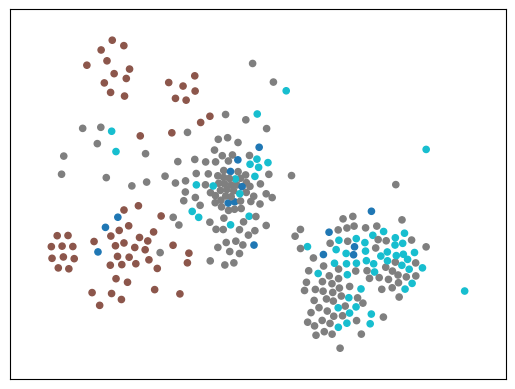

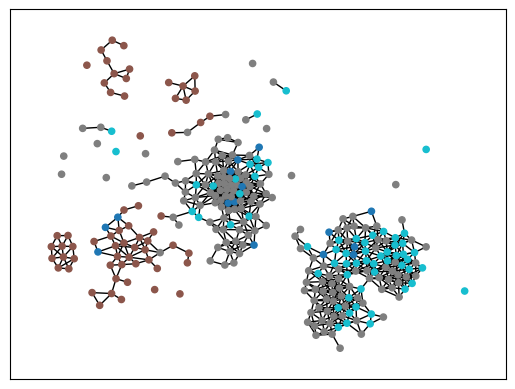

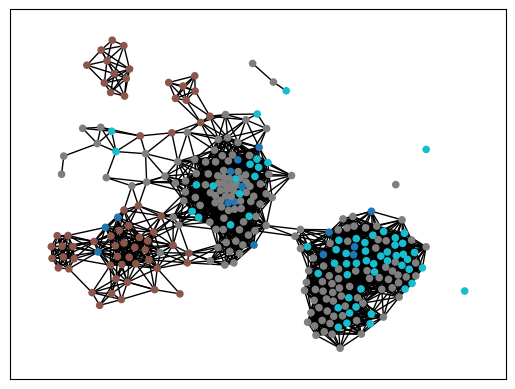

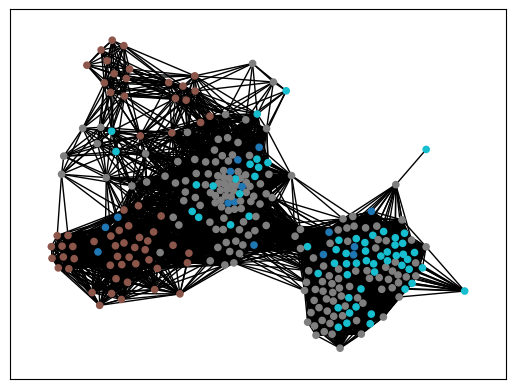

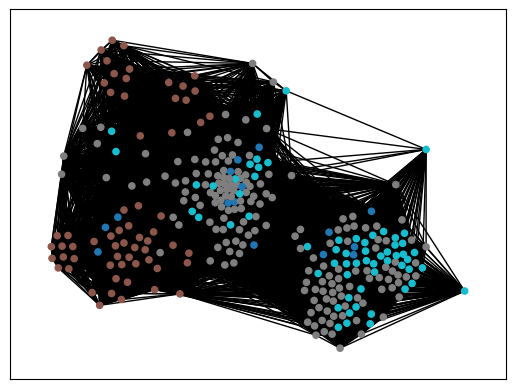

In [ ]:
### Run the code below
eps_values = [0.01, 0.05, 0.1, 0.2, 0.4]

for eps in eps_values: 
    ax=plt.subplot()
    ax1=plt.subplot()
    G = nn_graph(X, eps)
    #G1=nx.numpyto
    pos=nx.spring_layout(G)  
    nx.draw_networkx_edges(G,pos=X)
    nx.draw_networkx_nodes(G, pos=X, node_color=Y, node_size=20, cmap=plt.get_cmap('tab10'))
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    plt.show()

****
<span style="color:red">**YOUR ANSWER HERE**</span>


The epsilon-neighbor algorithm is only conserned on connecting the nodes that are close within epsilon in an euclidean space, given that each of them have a coordinate. Given epsilon increases, it means that we allow even further away nodes to connect with each other, therefore we expect more and more connections until all points are connected with each other. 

****

### Task 2.1.3 (4 points)

<span style='color: green'>**\[Implement\]**</span> a k-NN graph and compare with the $\varepsilon$-neighborhood graph. 

<span style='color: green'>**\[Motivate\]**</span> Under what conditions are they similar? 

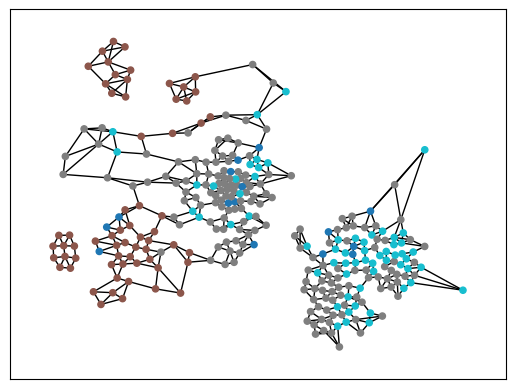

In [ ]:

def knn_graph(data, k, remove_self=True, directed=False):
    nn = NearestNeighbors(n_neighbors=k-1)  
    nn.fit(data)
    indices = nn.kneighbors(data, return_distance=False)  
    ##YOUR CODE HERE 

    G = nx.DiGraph() if directed else nx.Graph()

    
    G.add_nodes_from(range(len(data)))

    
    added_edges = set()

    
    for i, neighbors in enumerate(indices):
        for j in neighbors:
            if remove_self and i == j:
                continue  

            if directed:
                G.add_edge(i, j)
            else:
                edge = tuple(sorted((i, j)))
                if edge not in added_edges:
                    G.add_edge(i, j)
                    added_edges.add(edge)

    
    return G



#YOUR CODE HERE



G = knn_graph(X, 5)
pos=nx.spring_layout(G)  
nx.draw_networkx_edges(G,pos=X)
nx.draw_networkx_nodes(G, pos=X, node_color=Y, node_size=20, cmap=plt.get_cmap('tab10'))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.show()

****
<span style="color:red">**YOUR ANSWER HERE**</span>

Well, the difference between the epsilon-neighbors and k-NN is that nodes create edges totally differently, where the nodes from the epsilon-neighbors can have different degrees to whom they are connected to, whereas k-NN nodes do have a fixed and rigid degree, where the edges do not reflect nodes of distances withing a threshold.

One condition where both are similar is if the threshold distance in epsilon-neighbors algorithm is high enough to have all the nodes being connected with each other (distance = distance between the furthest two points from our graph), and having n-1 neighbors in the k-nn algorithm.

Another condition is given visible convex dense clusters, having a specific number of points per each cluster being relatively close to each other. 




****

### Task 2.1.4 (2 points)
Assign to each edge in the $\varepsilon$-neighborhood graph a weight

$$W_{i j}=e^{-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{t}}$$

<span style='color: green'>**\[Implement\]**</span> the function ```weighted_nn_graph``` below that returns the weighted graph given the data matrix in input and the values eps and t, where t is the parameter of the equation above. 

In [ ]:
def weighted_nn_graph(data, eps=20, t=0.1):
    n = len(data)
    G = nx.Graph()
    ### YOUR CODE HERE
    for i in range(n):
        for j in range(i + 1, n):
            dist = np.linalg.norm(data[i] - data[j])
            if dist  <= eps:
                weight = np.exp(-dist**2 / t)
                G.add_edge(i, j, weight=weight)
    
    ### YOUR CODE HERE
    return G

### Task 2.1.5 (2 points)

We now vary $t \in \{10, 0.1, 0.000001\}$. Plot the weights as a histogram in order to analyse the results using the provided code.</br>
What happens when $t$ is very small, close to $0$, i.e., $t \rightarrow 0$?</br> What happens when $t$ is very large?
</br>Is the behaviour with $t = 0$ expected?

<span style='color: green'>**\[Motivate\]**</span> your answer reasoning on the formula. 

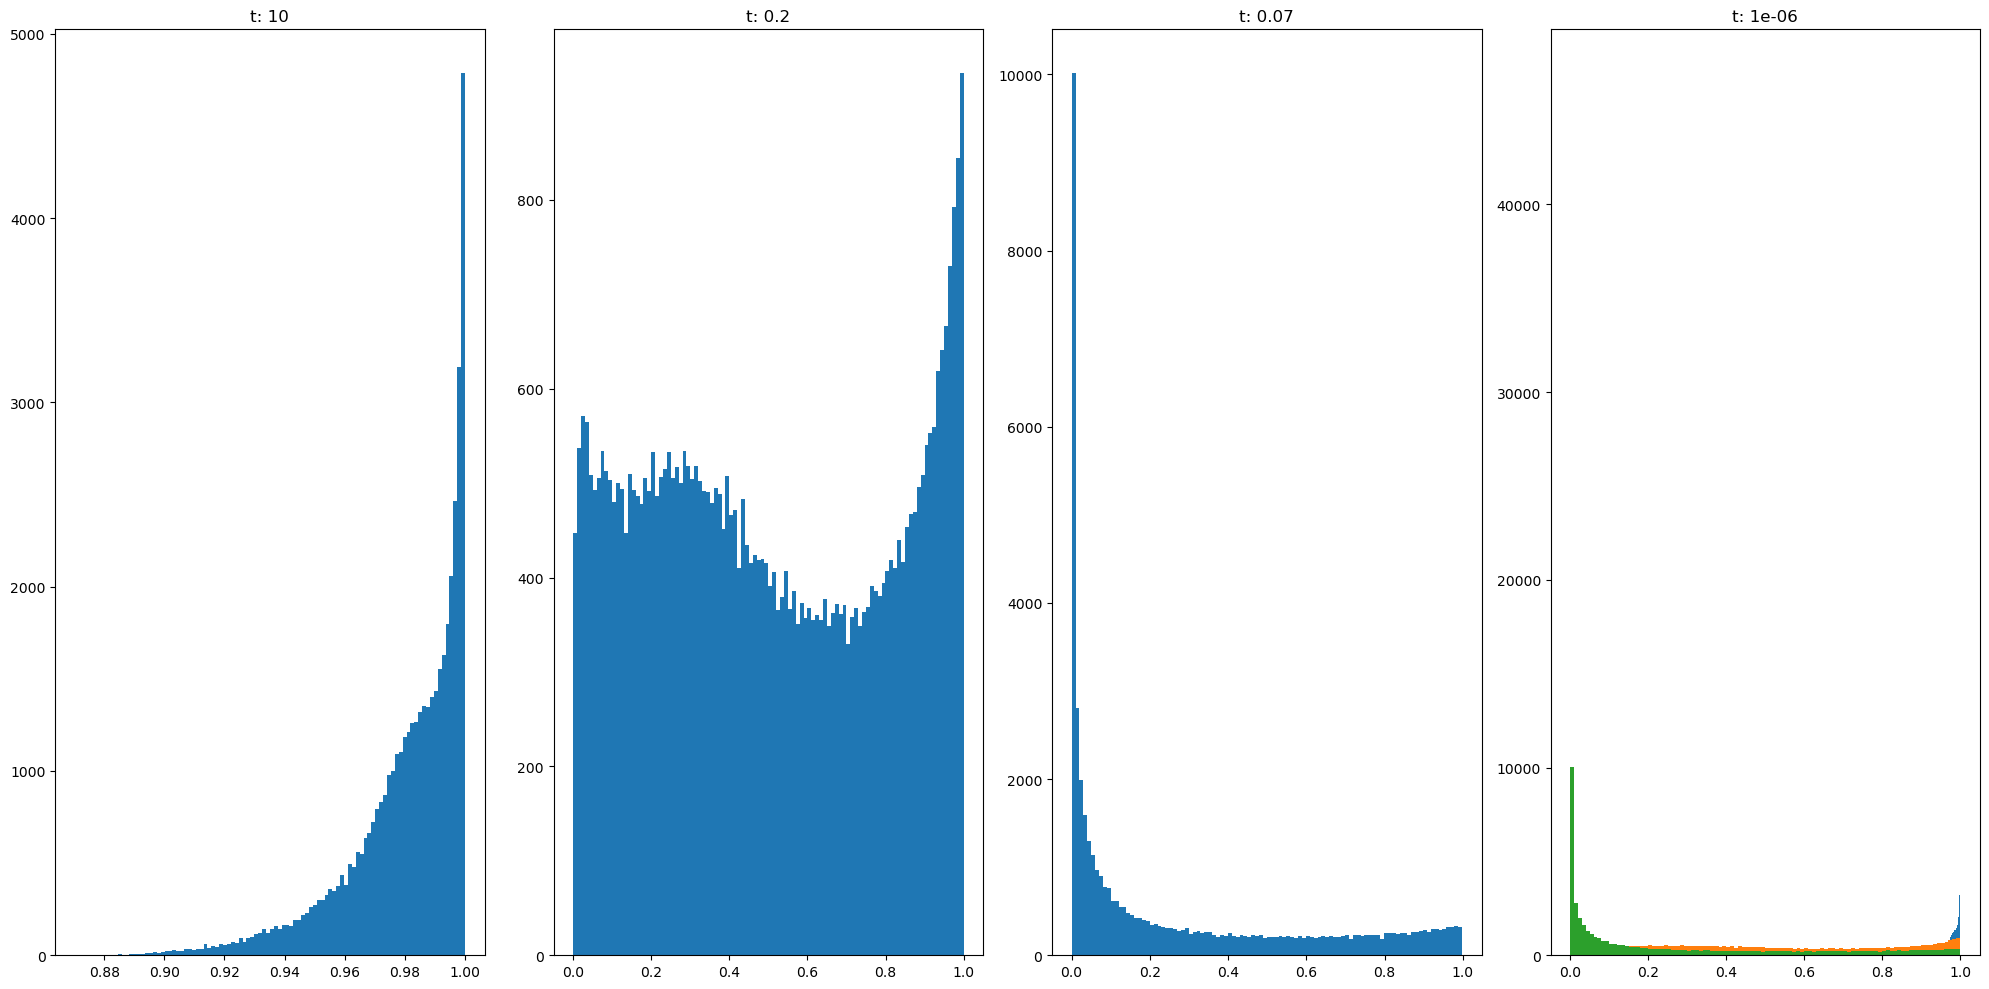

In [ ]:
ts = [10, 0.2, 0.07, 0.000001]
fig, ax = plt.subplots(1,4, figsize=(20, 10))
row = 0

for i, t in enumerate(ts):
    G = weighted_nn_graph(X, eps=60, t=t)
    ys = []
    

    col = i 
    for i, d in enumerate(G.edges.data()):
        ys.append(d[2]['weight'])
    plt.hist(ys, bins=100)
    ax[col].hist(ys, bins=100)
    ax[col].set_title("t: "+str(t))
    
plt.tight_layout()

******************
<span style="color:red">**YOUR ANSWER HERE**</span>

Ok, let's answer each question individually.  Regarding t very small, like very close to 0, we observe that there are way more 0 weight entries than the other from 1. That also makes sense, due to the fact that we take the epsilon of a very big negative number, we lend more towards 0, that's why the argument. 

Given that t is very large, like t=10, we can observe that the the weight frequency is distributed much more on the high end, where no many weights are smaller than 0.88. The frequencies are more distributed given t being around 0.2, for example. That' because we have the inner paranthesis being closer and closer to 0, where exp(0) = 1
 


******************

## Task 2.2: Spectral clustering (20 points)

### Task 2.2.1 (2 points)
Compute the eigenvectors and eigenvalues (using the provided function) of the Normalized Laplacian and the Random Walk Laplacian of the graph $G$.<br> 
Plot the spectrum (eigenvalues).

<span style='color: green'>**\[Implement\]**</span> the code to compute the different Laplacians. 

In [ ]:
def graph_eig(L): 
    """
        Takes a graph Laplacian and returns sorted the eigenvalues and vectors.
    """
    lambdas, eigenvectors = np.linalg.eig(L)
    lambdas = np.real(lambdas)
    eigenvectors = np.real(eigenvectors)
    
    order = np.argsort(lambdas)
    lambdas = lambdas[order]
    eigenvectors = eigenvectors[:, order]
    
    return lambdas, eigenvectors

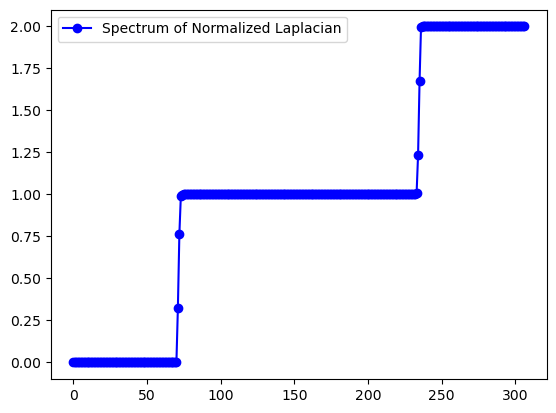

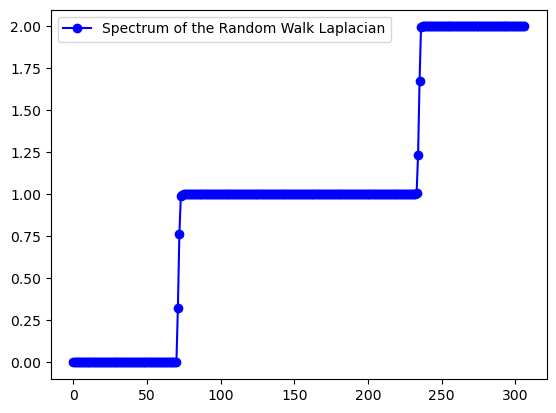

In [ ]:
L_norm = None
L_rw = None
nodeID = pickle.load(open('./data/nodeID.pickle', 'rb'))
A = nx.adjacency_matrix(G).toarray()  # Step 1: Adjacency matrix
n = A.shape[0]                        # Number of nodes

# Step 2: Degree matrix
D = np.zeros((n, n))
for i in range(n):
    D[i, i] = np.sum(A[i])           # degree of node i

# Step 3: Random Walk Laplacian: L_rw = I - D^-1 * A
L_rw = np.identity(n)
for i in range(n):
    if D[i, i] != 0:
        for j in range(n):
            L_rw[i, j] -= A[i, j] / D[i, i]
    # else: skip row entirely (node i has degree 0)

# Step 4: Normalized Laplacian: L_norm = I - D^-1/2 * A * D^-1/2
L_norm = np.identity(n)
for i in range(n):
    for j in range(n):
        if D[i, i] != 0 and D[j, j] != 0:
            L_norm[i, j] -= A[i, j] / (np.sqrt(D[i, i]) * np.sqrt(D[j, j]))
        # else: skip if either degree is 0 (isolated node)

eigval_norm, eigvec_norm = graph_eig(L_norm)
eigval_rw, eigvec_rw = graph_eig(L_rw)

plt.figure(0)
plt.plot(eigval_norm, 'b-o', label='Spectrum of Normalized Laplacian', )
plt.legend()
plt.figure(1)
plt.plot(eigval_rw, 'b-o', label='Spectrum of the Random Walk Laplacian')
plt.legend()

### Task 2.2.2 (5 points)
<span style='color: green'>**\[Implement\]**</span> the function ```spect_cluster``` that returns a vector ```y_clust``` in which each entry y_clust\[i\] represents the community assigned to node $i$. The method should be able to handle both the Normalized Laplacian, and the Random Walk Laplacian. You are allowed to use your implementation from the weekly exercises and ```sklearn.cluster.k_means``` for k-means clustering. 

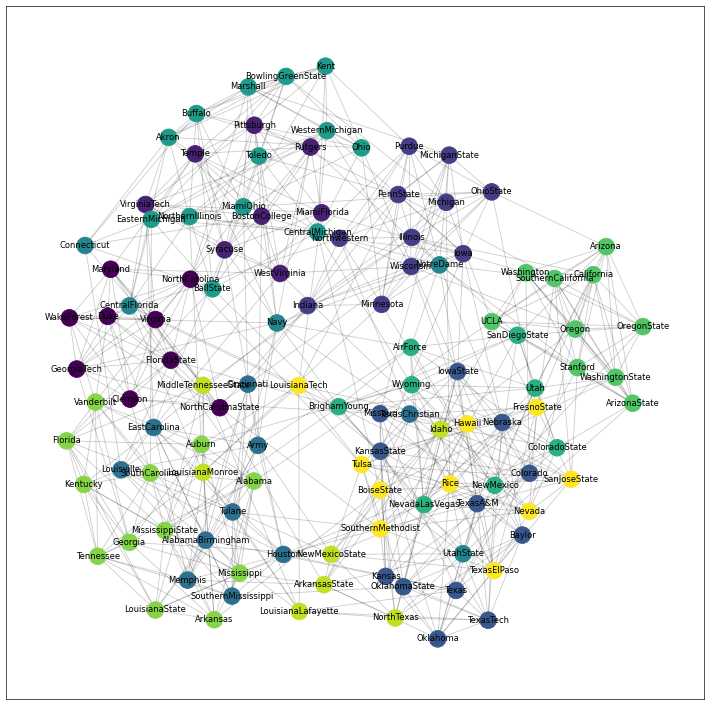

In [ ]:
G = nx.read_gml('./data/football.gml')
groundTruth = [data['gt'] for _, data in G.nodes(data=True)]


fig = plt.figure(1, figsize=(15, 15), dpi=60)
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx_edges(G, layout, alpha=0.2)
nx.draw_networkx_nodes(G, layout, node_color=groundTruth, node_size=400)
nx.draw_networkx_labels(G, layout, font_size=10)
plt.show()

In [ ]:
from sklearn.cluster import k_means

def spect_cluster(G, eig_type="normal", k=5, d=5):
    ### YOUR CODE HERE      
    pass
    ### YOUR CODE HERE
    return y_clust

In [ ]:
def plot_graph(G, clusters):
    fig = plt.figure(1, figsize=(20, 20), dpi=60)
    #nx.draw(G, pos=layout,with_labels = True, node_size=50, node_color=your_clusters,font_size=8, alpha=0.2)
    #layout = nx.spring_layout(H, k=5.15, iterations=20)
    layout = nx.kamada_kawai_layout(G)
    nx.draw_networkx_edges(G, layout, alpha = 0.2)
    nx.draw_networkx_nodes(G, layout, node_color=clusters, node_size=500)
    nx.draw_networkx_labels(G, layout)

your_clusters = spect_cluster(G, k=6)   
plot_graph(G, your_clusters)


NameError: name 'y_clust' is not defined

### Task 2.2.3 (4 points)

Finally, use your implementation of spectral clustering with different Laplacians and different values of $k \in [3,10]$ and plot the results using the helper function ```plot_graph```. 

<span style='color: green'>**\[Motivate\]**</span> the results you obtain. Especially, what is the difference between the Random Walk and the Normalized Laplacians, if any? How do you explain such differences? Can you detect easily all the ground truth communities? Are some communities not detected? Why do you think that happens? 

In [ ]:
### YOUR CODE HERE

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 2.2.4 (4 points)
<span style='color: green'>**\[Implement\]**</span> the modularity. Recall that the definition of modularity for a set of communities $C$ is
$$ 
Q=\frac{1}{2 m} \sum_{c \in C} \sum_{i \in c} \sum_{j \in c}\left(A_{i j}-\frac{d_{i} d_{j}}{2 m}\right) \qquad \qquad (1) 
$$
where $A$ is the adjacency matrix, and $d_i$ is the degree of node $i$

**Note**: Use ```plot_graph``` function in order to see for yourself if maximising modularity leads a better clustering. If you did not succeed with the previous Task you are allowed to use [Scikit Learn Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

In [ ]:
def modularity(G, clustering):
    IDnode = pickle.load(open('./data/IDnode.pickle', 'rb'))
    modularity = 0
    ### YOUR CODE HERE
    ### YOUR CODE HERE
    return modularity

### Task 2.2.5 (3 points)

Compute the modularity of your Spectral Clustering Implementation for different values of $k$. 

<span style='color: green'>**\[Motivate\]**</span> which value maximises the modularity. Is $k=6$ maximizing the modularity? If yes, is this consistent with the ground-truth? If not, is it because of an issue with modularity or with spectral clustering? 

In [ ]:
mods = []
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for k in ks:
    clusters = spect_cluster(G, k=k) ### NOTE: If you do not use your implementation substitute with a call to the sklearn one. 
    mods.append(modularity(G, clusters))

# You may want to use plt.plot to plot the modularity for different values of k
plt.plot(ks, mods)
print(mods)

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 2.2.6 (2 points)

<span style='color: green'>**\[Motivate\]**</span> There seems to be a relationship between graph embeddings and spectral clustering, can you guess that? _Hint_: Think to the eigenvectors of the graph's Laplacians.

* [ ] If the embeddings are linear and the similarity is the Laplacian, the embeddings we obtain minimizing the $L_2$ norm are equivalent to the eigenvectors of the Laplacian. 
* [ ] If the embeddings are random-walk-based embeddings, the eigenvectors of the Random Walk Laplacian are related to the embeddings obtained by such methods. 
* [ ] The relationship is just apparent. 
* [ ] If the embeddings are linear and the similarity is the Adjacency matrix, the eigenvectors of the Laplacian are equivalent to the embeddings. 

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

# Part 3: Link analysis

<span style="color:red">In the following sections we will be using **Cora** dataset. Below you can find a brief description of the dataset. More detailed info can be found in [./data/cora/README](./data/cora/README).</span> 

The **Cora dataset** is a collection of **Machine Learning papers** categorized into **seven classes**: Case-Based, Genetic Algorithms, Neural Networks, Probabilistic Methods, Reinforcement Learning, Rule Learning, and Theory. It contains **2708 papers**, where each paper cites or is cited by at least one other paper, forming a citation graph.

The dataset includes:
- **content file**: Paper descriptions with binary word attributes (presence or absence of 1433 unique words) and class labels.
- **cites file**: Citation relationships between papers, indicating which paper cites another.
- **papers file**: List of postscript files with IDs, filenames, and citation strings.

## Task 3.1 Cora dataset and PageRank (7 points)

The code below will be useful when working on exercises in the following sections.

In [35]:
content = pd.read_csv('data/cora/cora.content', sep='\t',
                  header=None,
                  usecols=[0, 1434],
                  names=['node_id', 'label'],
                  dtype={'node_id': str, 'label': 'category'},
                  index_col='node_id')

content['label_code'] = content['label'].cat.codes
content.head(5)

,label,label_code
node_id,,
31336,Neural_Networks,2
1061127,Rule_Learning,5
1106406,Reinforcement_Learning,4
13195,Reinforcement_Learning,4
37879,Probabilistic_Methods,3


In [36]:
papers = pd.read_csv('data/cora/cora.papers', sep='\t',
                  header=None,
                  names=['node_id', 'filename', 'citation'],
                  dtype={'node_id': str},
                  index_col='node_id')

papers.head(5)

,filename,citation
node_id,,
2,http:##dimacs.rutgers.edu#techps#1994#94-07.ps,"[Gar] <author> M.R. Garey & D.S. Johnson, </au..."
16,http:##www.cs.wisc.edu#~fischer#ftp#pub#tech-r...,"[DeWitt90] <author> D. DeWitt, P. Futtersack, ..."
18,ftp:##ftp.cs.purdue.edu#pub#hosking#papers#oop...,"[Hoski93a] <author> A. Hosking, J. E. B. Moss,..."
18,ftp:##ftp.cs.umass.edu#pub#osl#papers#oopsla93...,"[Hoski93a] <author> A. Hosking, J. E. B. Moss,..."
18,http:##cobar.cs.umass.edu#pubfiles#ds7.ps.gz,"[Hoski93a] <author> A. Hosking, J. E. B. Moss,..."


To get a better feeling of how the dataset looks like, you can run the code below to plot the graph with ground truth labelings.

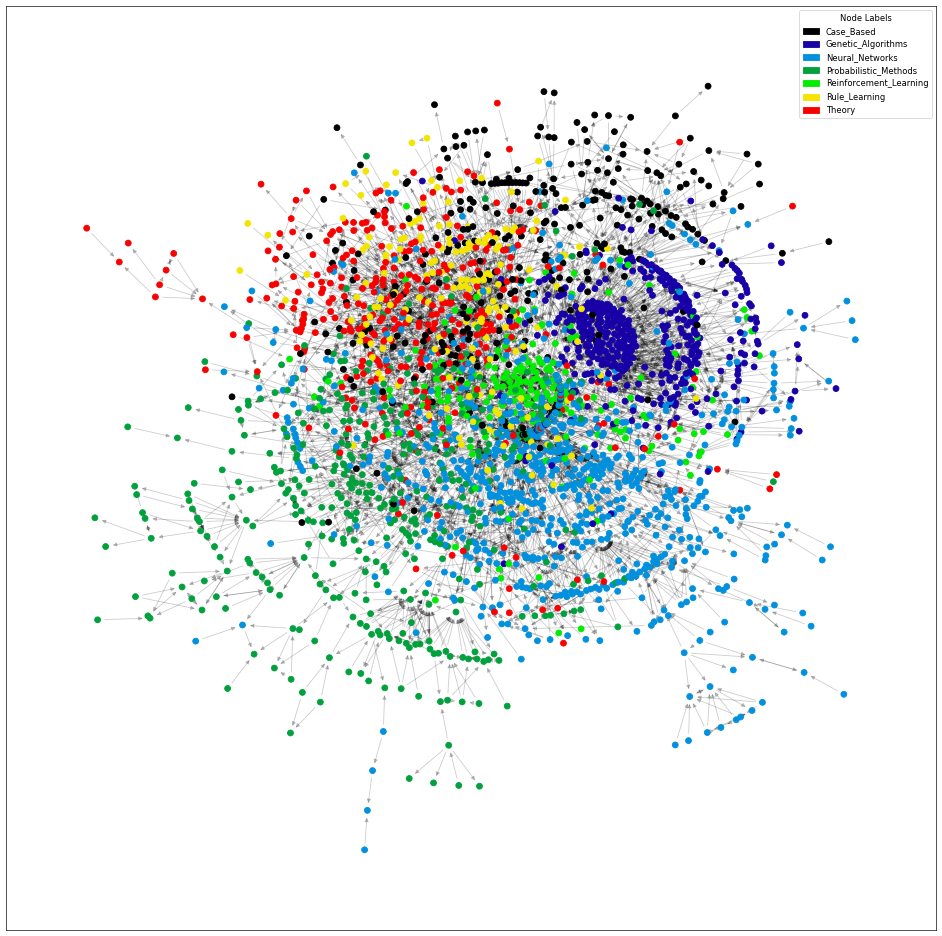

In [37]:
G: nx.DiGraph = nx.read_edgelist("data/cora/cora.cites", create_using=nx.DiGraph()).reverse()
plt.figure(1, figsize=(20, 20), dpi=60)
with open('data/cora/cora.layout.pkl', 'rb') as f:
    layout = pickle.load(f)
labels = content['label_code'].loc[list(G.nodes)].to_numpy()
unique_labels = content['label'].cat.categories
colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(unique_labels), endpoint=False))
color_map = dict(zip(unique_labels, colors))
node_colors = [color_map[content.loc[node]['label']] for node in G.nodes]
nx.draw_networkx_nodes(G, layout, node_color=node_colors, node_size=50)
nx.draw_networkx_edges(G, layout, alpha = 0.2)

handles = [mpatches.Patch(color=color_map[label], label=label) for label in unique_labels]
plt.legend(handles=handles, loc='best', title='Node Labels')
plt.show()

### Task 3.1.1 (2 points)

<span style='color: green'>**\[Implement\]**</span> From the [MMD] book we know that

*"PageRank is a function that assigns a real number to each page in the Web [...] The intent is that the higher the PageRank of a page, the more
“important” it is."*.

Put yourself in the shoes of an eager Machine Learning student mostly interested in "Reinforcement_Learning" who wants to find the most important papers to read. Run **Topic-specific** PageRank on the graph induced by the Cora dataset. Find the top 10 papers with the highest PageRank.

<span style='color: red'>For this task, use `nx.pagerank` which uses the Power Iteration method.</span>


In [38]:
# Construct directed graph
G_: nx.DiGraph = nx.read_edgelist("data/cora/cora.cites", create_using=nx.DiGraph()).reverse()

### YOUR CODE HERE


### YOUR CODE HERE

### Task 3.1.2 (3 points)

<span style='color: green'>**\[Motivate\]**</span> An important observation about the graph induced by the Cora dataset is that, at least in theory, it should be acyclic. Can you see why?

Consider the PageRank-related problems discussed in one of the lectures, such as "sink nodes," "spider traps," and "link farms." Do these problems exist in acyclic graphs? Motivate your answer.

If **YES**, are these problems amplified or diminished?



******************
<span style="color:red">**YOUR ANSWER HERE**</span> <br>
******************

### Task 3.1.3 (2 points)
Run the same experiment as in task 3.1.1, but this time on the undirected version of the graph.

<span style='color: green'>**\[Motivate\]**</span> which experiment do you think finds more important papers? Explain why you think so.


In [39]:
# Construct undirected graph
G: nx.Graph = nx.read_edgelist("data/cora/cora.cites", create_using=nx.Graph())

### YOUR CODE HERE

******************
<span style="color:red">**YOUR ANSWER HERE**</span> <br>
******************

## Task 3.2 Approximate PageRank (10 points)

### Task 3.2.1 (4 points)

<span style='color: green'>**\[Implement\]**</span>  a different algorithm for computing Personalized PageRank. This algorithm runs a fixed number of iterations and uses the definition of random walks. 
At each step, the algorithm either selects a random neighbor with probability $\alpha$ or returns to the starting node with probability $1-\alpha$. Every time a node is visited a counter on the node is incremented by one. Initially, each counter is 0. The final ppr value is the values in the nodes divided by the number of iterations. 

In [40]:
import random

def approx_personalized_pagerank(G: nx.Graph, node, alpha = 0.85, iterations = 1000):
    """
    Compute the approximate personalized PageRank for a given node in a graph using random walks.

    Parameters:
    G (networkx.Graph): The input graph.
    node (int or str): The starting node for the random walks.
    alpha (float): The probability of continuing the random walk to a neighbor.
    iterations (int): The number of steps to perform.

    Returns:
    dict: A dictionary where keys are nodes and values are the approximate personalized PageRank values.
    """
    ppr = dict(zip(G.nodes, np.zeros(len(G.nodes))))
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return ppr

### Task 3.2.2 (4 points)

Run the ```approx_personalized_pagerank``` with default $\alpha$ and iterations $\{10, n, 2n, 10n, 100n, 1000n\}$ where $n$ is the number of nodes in the graph and starting node the node with the highest PageRank. Compare it to the PageRank obtained by running ```nx.pagerank(G, alpha=0.85, personalization={node_highest_pagerank: 1})```.

In [41]:
G: nx.Graph = nx.read_edgelist("data/cora/cora.cites", create_using=nx.Graph())
n = G.number_of_nodes()

### YOUR CODE HERE


### YOUR CODE HERE

A). <span style='color: green'>**\[Motivate\]**</span>  Why are the values and the top-10 nodes ranked by Approximate PPR changing so much? 

******************
<span style="color:red">**YOUR ANSWER HERE**</span>  

******************

B). <span style='color: green'>**\[Motivate\]**</span> What do you notice as the number of iterations increase? Is there a relationship between the number of iterations and the results? Is there a relationship between the approximated value of PageRank and the real value?

*****************
<span style="color:red">**YOUR ANSWER HERE**</span>  

*****************

### Task 3.2.3 (2 points)

Run again the same experiment as in task 3.2.2 but this time use $\alpha = 0.1$. 

<span style='color: green'>**\[Motivate\]**</span> Motivate whether and why you need more or less iterations to predict the 10 nodes with the highest PPR.

In [42]:
### YOUR CODE HERE

*****************
<span style="color:red">**YOUR ANSWER HERE**</span>  

*****************

## Task 3.3 Spam and link farms (6 points)

While the Cora dataset is theoretically expected to be acyclic, this is not always the case in practice. Two papers may cite each other (e.g., preprints or conference versions), forming a cycle that artificially boosts their PageRank. Although a single cycle has a minor impact on PageRank, the effect accumulates when a node is part of many cycles. From the lectures, you should know that this type of structure is called a *link farm*.

The goal of this exercise is to identify link farms in Cora graph.

### Task 3.3.1 (3 points)
A). <span style='color: green'>**\[Implement\]**</span> <br> 
Compute spam mass of each node.

***[Hint]** One way to interpret spam mass is as the deviation of TrustRank from PageRank. For more info check lecture notes.* <br>
***[Note]** To compute PageRank you can use `nx.pagerank`.*

In [43]:
# Directed graph where an edge points from the paper which contains the citation to the paper being cited
G: nx.DiGraph = nx.read_edgelist("data/cora/cora.cites", create_using=nx.DiGraph()).reverse()

### YOUR CODE HERE

# spam_mass = 

### YOUR CODE HERE

NameError: name 'spam_mass' is not defined

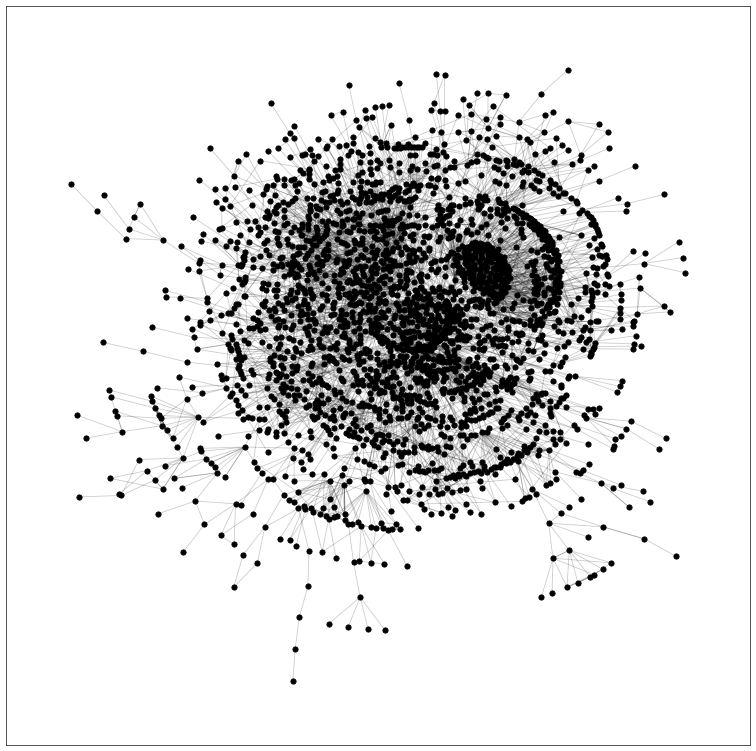

In [44]:
# Run the code below to visualize how the spam mass computed by you is distributed across the graph
c_map = plt.cm.OrRd
plt.figure(1, figsize=(16, 16), dpi=60)
with open('data/cora/cora.layout.pkl', 'rb') as f:
    layout = pickle.load(f)
nx.draw_networkx_edges(G, layout, alpha = 0.2, arrows=False) # arrows=False to speed up plotting
nx.draw_networkx_nodes(G, layout, node_color="black", node_size=40)
nx.draw_networkx_nodes(G, layout, node_color=spam_mass, node_size=40, cmap=c_map)
rg = spam_mass.max() - spam_mass.min()
handles = [mpatches.Patch(color=c_map(i/10), label=f'{ (spam_mass.min() +  rg*i/10):.3f}') for i in range(11)]
plt.legend(handles=handles, loc='best', title='Spam Mass')
plt.show()

B). <span style='color: green'>**\[Motivate\]**</span> <br>
Explain how you compute spam mass. How to interpret the values. Why does your method even work.

*****************
<span style="color:red">**YOUR ANSWER HERE**</span>  

*****************

### Task 3.3.2 (3 points)
A). <span style='color: green'>**\[Motivate\]**</span> <br> 
Based on the values of spam mass you computed, choose threshold value that separates spam nodes from non-spam nodes. Motivate your choice of the threshold value.

In [ ]:
### YOUR CODE HERE IF NEEDED
### you might want to plot something


*****************
<span style="color:red">**YOUR ANSWER HERE**</span>  

*****************

B). <span style='color: green'>**\[Implement\]**</span> <br> 
Based on the threshold value find spam nodes. Print them.

In [ ]:
### YOUR CODE HERE
# spam_nodes = 

### YOUR CODE HERE

C). <span style='color: green'>**\[Motivate\]**</span> <br> 
The code below plots the spam nodes identified by you and the citation cycles present in the graph.

Analyze the plot. Is there a relationship between position of spam nodes and citation cycles?

In [ ]:
# Plot spam nodes and citation cycles

plt.figure(figsize=(10, 10))
with open('data/cora/cora.layout.pkl', 'rb') as f:
    pos = pickle.load(f)
nx.draw_networkx_edges(G, pos, alpha = 0.1, arrows=False)

# draw cycles
cycles = [cycle for cycle in nx.simple_cycles(G)]
for cycle in cycles:
    cycle_edges = list(zip(cycle, cycle[1:] + [cycle[0]]))
    nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='red', alpha=0.2, arrows=False)

# draw spam nodes
nx.draw_networkx_nodes(G, pos, nodelist=spam_nodes, node_color="blue", node_size=20)

blue_patch = mpatches.Patch(color='blue', label='Spam Node')
red_patch = mpatches.Patch(color='red', label='Citation Cycle')
plt.legend(handles=[blue_patch, red_patch])

plt.show()

*****************
<span style="color:red">**YOUR ANSWER HERE**</span>  

*****************

# Part 4: Graph embeddings

In this section we will be using Cora dataset. Basic information about the dataset can be found at the beginning of [section 3](#part-3-link-analysis).

The goal is, given the set of papers and all information we have about them, we want to find groups of similar papers. We know ground truth labeling of the papers, we will use it to measure the performance of our methods.

In [45]:
# The graph of papers
G: nx.Graph = nx.read_edgelist("data/cora/cora.cites", create_using=nx.Graph())

In [46]:
# The information we have about the papers, including ground truth labeling
content = pd.read_csv('data/cora/cora.content', sep='\t', header=None, dtype={0: str, 1434: 'category'})

content.rename(columns={0: 'node_id'}, inplace=True)
content.rename(columns={1434: 'label'}, inplace=True)
content['label_code'] = content['label'].cat.codes
content.set_index('node_id', inplace=True)

content.head(5)


,1,2,3,4,5,6,7,8,9,10,...,1426,1427,1428,1429,1430,1431,1432,1433,label,label_code
node_id,,,,,,,,,,,,,,,,,,,,,
31336,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,Neural_Networks,2
1061127,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Rule_Learning,5
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Reinforcement_Learning,4
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Reinforcement_Learning,4
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Probabilistic_Methods,3


***[Hint]**<br>
To get adjacency matrix use `nx.to_numpy_array(G)` <br>
To get vector of labels use `content['label_code'].loc[list(G.nodes)].to_numpy()` <br>
To get matrix of word attributes use `content[range(1, 1434)].loc[list(G.nodes)].to_numpy()`*

## Task 4.1 (13 points)

In this part, the strategy is going to be the following:

1. Use VERSE [[1]](https://arxiv.org/pdf/1803.04742.pdf) to produce embeddings of the nodes in the graph.
2. Use K-Means to cluster the embeddings. Measure and report NMI for the clustering. 

[[1](https://arxiv.org/pdf/1803.04742.pdf)] Tsitsulin, A., Mottin, D., Karras, P. and Müller, E., 2018, April. Verse: Versatile graph embeddings from similarity measures. In Proceedings of the 2018 World Wide Web Conference (pp. 539-548).

### Task 4.1.1 (6 points)

<span style='color: green'>**\[Implement\]**</span> the methods below to compute sampling version of VERSE. 

_Hint1:_ it might be a help to look in the original article \[1\] above.

_Hint2:_ Line 14-15 in the pseudo code from the paper contains a typo:<br>
 Line 14 should be $W_u \leftarrow W_u+(g*W_v)$

 Line 15 should be $W_v \leftarrow W_v+(g*W_u)$

In [64]:
from tqdm import tqdm
from typing import Union
import numpy as np
import networkx as nx

def sigmoid(x):
    ''' sigmoid of x '''
    ### YOUR CODE HERE
    clipped_x = np.clip(x, -500, 500)
    result = 1 / (1 + np.exp(-clipped_x))
    ### YOUR CODE HERE
    return result

def pagerank_matrix(G: Union[nx.Graph, nx.DiGraph], alpha = 0.85) :
    ''' pagerank matrix '''
    ### YOUR CODE HERE
    n = G.number_of_nodes()
    node_list = list(G.nodes())
    node_to_idx = {node: i for i, node in enumerate(node_list)}
    P = np.zeros((n, n))
    for i, node in enumerate(tqdm(node_list, desc="ppr matrix")):
        personalization = {n: 0 for n in node_list}
        personalization[node] = 1
        try:
            ppr_vector_dict = nx.pagerank(G, alpha=alpha, personalization=personalization, max_iter=100, tol=1e-6)
            for target_node, score in ppr_vector_dict.items():
                if target_node in node_to_idx:
                    j = node_to_idx[target_node]
                    P[i, j] = score
        except nx.PowerIterationFailedConvergence:
            print(f"converge fail {node}, uniform fallback {i}.")
            P[i, :] = 1.0 / n
    row_sums = P.sum(axis=1)
    non_zero_rows = row_sums > 0
    P[non_zero_rows] = P[non_zero_rows] / row_sums[non_zero_rows, np.newaxis]
    zero_rows = ~non_zero_rows
    if np.any(zero_rows):
        print(f"zero rows {np.sum(zero_rows)}, uniform.")
        P[zero_rows, :] = 1.0 / n
    ### YOUR CODE HERE
    assert np.allclose(P.sum(axis=1), 1), "rows sum 1"
    assert np.all(P >= 0), "non-negative"
    return P

def update(u, v, Z, C, step_size) :
    '''update Z gradients'''
    ### YOUR CODE HERE
    D_label = C
    n_nodes = Z.shape[0]
    if not (0 <= u < n_nodes and 0 <= v < n_nodes):
        print(f"invalid index u={u}, v={v} for {Z.shape}")
        return
    W_u = Z[u, :]
    W_v = Z[v, :]
    dot_product = np.dot(W_u, W_v)
    q = (D_label - sigmoid(dot_product)) * step_size
    grad_W_u = q * W_v
    grad_W_v = q * W_u
    Z[u, :] += grad_W_u
    Z[v, :] += grad_W_v
    ### YOUR CODE HERE

def verse(G, S, d, k = 3, step_size = 0.05, steps = 100_000):
    ''' sampled verse '''
    n = G.number_of_nodes()
    ### YOUR CODE HERE
    variance = 1.0 / d
    std_dev = np.sqrt(variance)
    Z = np.random.normal(loc=0.0, scale=std_dev, size=(n, d))
    node_indices = np.arange(n)
    for _ in tqdm(range(steps), desc="verse train"):
        u = np.random.choice(node_indices)
        sim_distribution = S[u, :]
        sim_distribution = np.maximum(sim_distribution, 0)
        prob_sum = np.sum(sim_distribution)
        if not np.isclose(prob_sum, 1.0):
            if prob_sum > 0:
                sim_distribution /= prob_sum
            else:
                sim_distribution = np.ones(n) / n
        try:
            v = np.random.choice(node_indices, p=sim_distribution)
        except ValueError as e:
            print(f"sample error {u}: {e}")
            print(f"prob sum: {np.sum(sim_distribution)}")
            continue
        update(u, v, Z, 1, step_size)
        for _ in range(k):
            v_bar = np.random.choice(node_indices)
            while v_bar == v:
                v_bar = np.random.choice(node_indices)
            update(u, v_bar, Z, 0, step_size)
    ### YOUR CODE HERE
    return Z

In [66]:
# use already generated embeddings
load_embeddings = False

In [67]:
# This code runs the `verse` algorithm above on G. You might want to change `step_size` and `steps` 
if not load_embeddings:
    P   = pagerank_matrix(G)
    emb = verse(G, P, 8, step_size=0.08, steps=500_000)

verse train: 100%|██████████| 500000/500000 [06:14<00:00, 1334.66it/s]


In [50]:
# You can save the embeddings to a local file using the below
if not load_embeddings:
    np.save('verse.npy', emb)
else:
    emb = np.load('verse.npy')

### Task 4.1.2 (3 points)

<span style='color: green'>**\[Implement\]**</span> a small piece of code that runs K-means on the embeddings with $k \in [2,10]$ to evaluate the performance compared to Spectral clustering from section 2 using the NMI as measure. You can use ```sklearn.metrics.normalized_mutual_info_score``` for the NMI and ```sklearn.cluster.KMeans``` for kmeans. In both cases, you can use your own implementation from Handin 1 or the exercises, but it will not give you extra points.  

<span style='color: green'>**\[Motivate\]**</span> which of the method performs the best and whether the results show similarities between the two methods

*[Note] You might need to tweak parameters of VERSE and Spectral Clustering to get meaningful results.*

Running K-Means on VERSE embeddings...


K-Means Progress: 100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


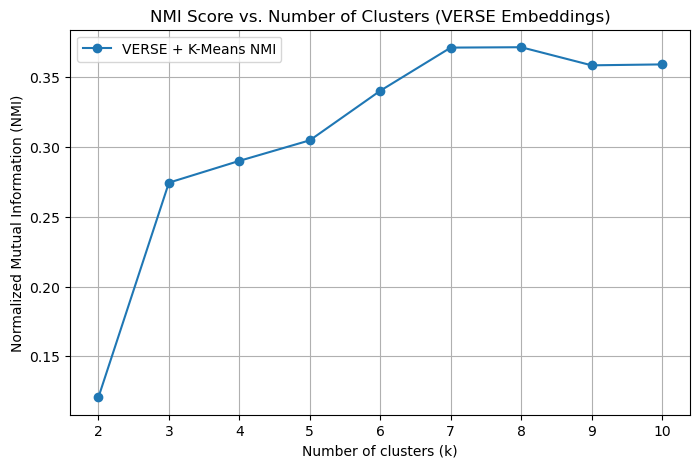


NMI Scores (VERSE + K-Means):
k=2: 0.1207
k=3: 0.2745
k=4: 0.2901
k=5: 0.3048
k=6: 0.3403
k=7: 0.3712
k=8: 0.3715
k=9: 0.3585
k=10: 0.3592

Best NMI score: 0.3715 at k=8


In [ ]:
### YOUR CODE HERE

from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

node_list_ordered = list(G.nodes())
ground_truth_labels = content.loc[node_list_ordered]['label_code'].to_numpy()

k_values = range(2, 11) # k is [2, 10]
nmi_scores_verse = []

print("Running K-Means on VERSE embeddings...")
for k in tqdm(k_values, desc="K-Means Progress"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50).fit(emb) # random state set for determinism
    nmi = normalized_mutual_info_score(ground_truth_labels, kmeans.labels_)
    nmi_scores_verse.append(nmi)

plt.figure(figsize=(8, 5))
plt.plot(k_values, nmi_scores_verse, marker='o', label='VERSE + K-Means NMI')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Normalized Mutual Information (NMI)")
plt.title("NMI Score vs. Number of Clusters (VERSE Embeddings)")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

print("\nNMI Scores (VERSE + K-Means):")
best_k_verse = -1
best_nmi_verse = -1
for k, score in zip(k_values, nmi_scores_verse):
    print(f"k={k}: {score:.4f}")
    if score > best_nmi_verse:
        best_nmi_verse = score
        best_k_verse = k
print(f"\nBest NMI score: {best_nmi_verse:.4f} at k={best_k_verse}")

### YOUR CODE HERE

*******************

Observing the output NMI scores for k=2 through 10 allows us to identify the value of k where K-Means, using the VERSE embeddings, best aligns with the ground truth labels. It reaches its peak score at the true cluster count, suggesting, that VERSE successfully interpreted the dataset. The decrease in NMI for k > ~7 is expected, as K-Means starts unnecessarily splitting the natural clusters found in the embeddings, thus reducing the alignment with the true clustering.

# TODO: add spectral clustering comparison

******************

### Task 4.1.3 (4 points)
A). <span style='color: green'>**\[Implement\]**</span> <br>
Each node in Cora dataset has a set of binary word attributes which represent a presence or absence of 1433 unique words. Combine them with the embeddings obtained in task 4.1.1. Run K-means on data containing:
- only embeddings from task 4.1.1
- binary word attributes and embeddings combined

Run similar experiment as in task 4.1.2, but this time compare NMI's of the above data representations.

***[Hint]** To make the experiment more stable, run it, for example, 10 times and take the average of the results.*


running k-means 20 times...


k-means comparison: 100%|██████████| 9/9 [01:05<00:00,  7.28s/it]


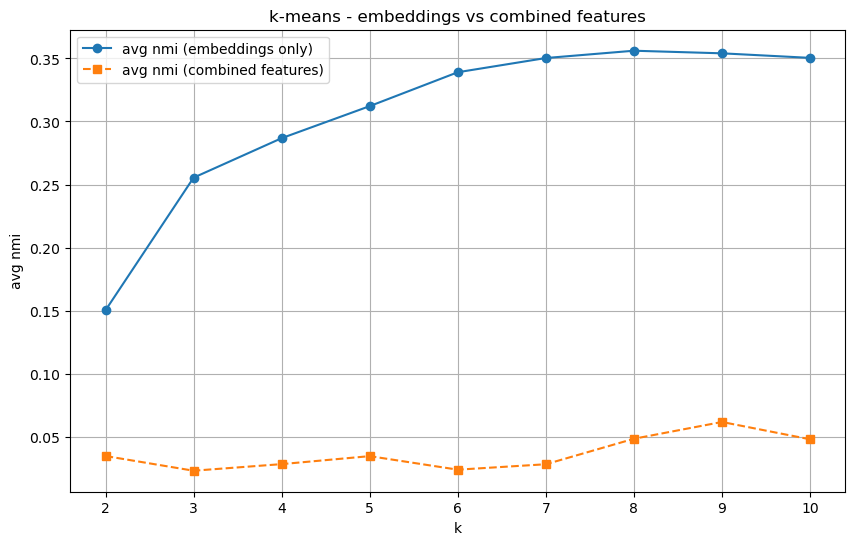


average nmi scores:
k	emb only	combined
2	0.1503		0.0347
3	0.2554		0.0230
4	0.2868		0.0283
5	0.3122		0.0346
6	0.3391		0.0239
7	0.3503		0.0282
8	0.3561		0.0484
9	0.3541		0.0617
10	0.3505		0.0479

best avg nmi on emb: 0.3561 at k=8
best avg nmi on combined: 0.0617 at k=9


In [ ]:
### YOUR CODE HERE

from sklearn.preprocessing import StandardScaler

# variables
if 'emb' not in locals():
    emb = np.load('verse.npy')

# implementation
word_attributes = content.loc[node_list_ordered, range(1, 1434)].to_numpy()

# combine embeddings and word attributes
scaler_emb = StandardScaler()
emb_scaled = scaler_emb.fit_transform(emb)

scaler_attr = StandardScaler()
word_attributes_scaled = scaler_attr.fit_transform(word_attributes.astype(float) + 1e-9)

combined_features = np.concatenate((emb_scaled, word_attributes_scaled), axis=1)

# run k-means 10 times
n_runs = 10
k_values = range(2, 11)
avg_nmi_emb_only = []
avg_nmi_combined = []

print(f"\nrunning k-means {n_runs} times...")

for k in tqdm(k_values, desc="k-means comparison"):
    nmi_runs_emb = []
    nmi_runs_combined = []
    for i in range(n_runs):

        # deterministic random state, but different for each iteration
        random_state = i + 42

        # k-means using original embeddings emb
        kmeans_emb = KMeans(n_clusters=k, random_state=random_state, n_init=1).fit(emb) # Use random_state=i
        nmi_emb = normalized_mutual_info_score(ground_truth_labels, kmeans_emb.labels_)
        nmi_runs_emb.append(nmi_emb)

        # k-means using combined_features
        kmeans_combined = KMeans(n_clusters=k, random_state=random_state, n_init=1).fit(combined_features)
        nmi_combined = normalized_mutual_info_score(ground_truth_labels, kmeans_combined.labels_)
        nmi_runs_combined.append(nmi_combined)

    avg_nmi_emb_only.append(np.mean(nmi_runs_emb))
    avg_nmi_combined.append(np.mean(nmi_runs_combined))

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_nmi_emb_only, marker='o', linestyle='-', label='avg nmi (embeddings only)')
plt.plot(k_values, avg_nmi_combined, marker='s', linestyle='--', label='avg nmi (combined features)')
plt.xlabel("k")
plt.ylabel("avg nmi")
plt.title("k-means - embeddings vs combined features")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

print("\naverage nmi scores:")
print("k\temb only\tcombined")
for k, nmi_e, nmi_c in zip(k_values, avg_nmi_emb_only, avg_nmi_combined):
    print(f"{k}\t{nmi_e:.4f}\t\t{nmi_c:.4f}")

# Find best k for each representation
best_k_emb_only = k_values[np.argmax(avg_nmi_emb_only)]
best_nmi_emb_only = max(avg_nmi_emb_only)
best_k_combined = k_values[np.argmax(avg_nmi_combined)]
best_nmi_combined = max(avg_nmi_combined)

print(f"\nbest avg nmi on emb: {best_nmi_emb_only:.4f} at k={best_k_emb_only}")
print(f"best avg nmi on combined: {best_nmi_combined:.4f} at k={best_k_combined}")

### YOUR CODE HERE

B). <span style='color: green'>**\[Motivate\]**</span> <br>
Analyze the plot above. What are your conclusions? Was combining embeddings and word attributes a good idea?

*******************
The blue line (embeddings only) reaches its peak from 7 to 8, however the orange line (with combined features) pales in performance in comparison. Combining the VERSE embeddings with the high-dimensional binary word attributes degraded the clustering performance of K-Means. The structure captured effectively by the embeddings alone seems to be obscured or overwhelmed when the word attributes are added.

Based on these results, combining the features using simple concatenation and scaling made the results worse. The embeddings alone provided a much better representation for this specific clustering task and algorithm.
******************

C). <span style='color: green'>**\[Motivate\]**</span> <br>

Is K-means a good choice for clustering binary word attributes and embeddings combined?

Consider other clustering algorithms you learned about in the first part of the course. Which one of them do you think would do better job at clustering binary word attributes and embeddings combined? Why?

*******************
It is not a good choice. K-Means relies on Euclidean distance and aims to minimize variance, performing best on well-separated, spherical clusters. The combined dataset merges low-dimensional, dense embeddings with very high-dimensional (1433 dimensions), sparse, binary word attributes.

Euclidean distance might not effectively capture similarity in the high-dimensional binary space or the combined space. The large number of binary dimensions could dominate the distance calculation, overshadowing the potentially more informative (but lower-dimensional) embeddings, even with scaling.
The underlying cluster shapes in the combined space are unlikely to be spherical.

Methods like k-Prototypes are explicitly designed for datasets with both numerical embeddings and binary attributes, using different distance metrics appropriately. By using appropriate distance measures for each data type, k-Prototypes avoids the issues of Euclidean distance applied to binary data and the potential dominance of one feature type over the other. It respects the nature of both the embeddings and the word attributes.

******************

D). <span style='color: green'>**\[Motivate\]**</span> <br>
How would you expand the graph embeddings for a multi-edge-label graph, where each edge must have exactly one label from multiple possible labels? The graph can also contain multiple edges between the same pair of nodes, provided they have different labels.

*******************
Extending algorithms to consider edge types:
- Modify random walk generation to consider edge types and generate type-specific walks whose results are combined.
- For VERSE, redefine the cost function to consider edge types.
******************

## Task 4.2 (10 points)
In this section, you will use the PyTorch library, primarily designed for machine learning. If you have never worked with PyTorch before, the link below should help you get started:
- https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

### Task 4.2.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> a new GCN that optimizes for modularity. The loss function takes in input a matrix $C \in \mathbb{R}^{n\times k}$ of embeddings for each of the nodes. 
$C$ represents the community assignment matrix, i.e. each entry $C_{ij}$ contains the probability that node $i$ belong to community $j$. 

The loss function is the following
$$
loss = - Tr(C^\top B C) + l\|C\|_2
$$ 
where $B$ is the modularity matrix that you will also implement, and $l$ is a regularization factor controlling the impact of the $L_2$ regularizer. 
We will implement a two-layer GCN similar to the one implemented in the exercises, but the last layer's activation fucntion is a Softmax. 

In [ ]:
# Adjacency matrix
G: nx.Graph = nx.read_edgelist("data/cora/cora.cites", create_using=nx.Graph())
A           = nx.to_numpy_array(G)
I           = np.eye(A.shape[0])
A           = A + I # Add self loop

### YOUR CODE HERE
# Degree matrix
row_sum = np.array(A.sum(axis=1))
D = np.diag(row_sum.flatten())
# D_hat^(-1/2)
d_inv_sqrt = np.power(row_sum.flatten(), -0.5)
# d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
# diagonal matrix D_hat^(-1/2)
D_hat_inv_sqrt = np.diag(d_inv_sqrt)
### YOUR CODE HERE

# Normalized Laplacian
L = D_hat_inv_sqrt @ A @ D_hat_inv_sqrt

# Create input matrix
# (keep in mind that you have access to word attributes, you might want to use it somehow)
X = content.reindex(node_list_ordered).loc[:, list(range(1, 1434))].fillna(0).to_numpy(dtype=np.float32)

### TODO your code here

X = torch.tensor(X, dtype=torch.float, requires_grad=True)
As = torch.tensor(A, dtype=torch.float)
L = torch.tensor(L, dtype=torch.float)

In [69]:
# Define a GCN
class GCNLayer(nn.Module):
    def __init__(self, L, input_features, output_features, activation=F.relu):
        """
            Inputs:
                L:               The "Laplacian" of the graph, as defined above
                input_features:  The size of the input embedding
                output_features: The size of the output embedding 
                activation:      Activation function sigma
        """
        super().__init__()
        
        ### TODO Your code here
        self.L = L
        self.activation = activation
        # weights
        self.W = nn.Parameter(torch.empty(input_features, output_features))
        if activation == F.relu:
            gain = nn.init.calculate_gain('relu')
        elif activation == F.softmax or activation == torch.sigmoid: # Softmax often uses sigmoid gain too
            gain = nn.init.calculate_gain('sigmoid')
        else:
            gain = nn.init.calculate_gain('linear')
        nn.init.xavier_uniform_(self.W.data, gain=gain)
        ### TODO Your code here
     
    def forward(self, X):
        ### TODO Your code here
        
        # TODO: Ensure L is on the same device as X
        # L_device = self.L.to(X.device)
        
        support = torch.mm(self.L, X) # L * X
        X = torch.mm(support, self.W) # (L * X) * W
        
        # Apply the activation function if one is specified
        if self.activation is not None:
             # Handle softmax specifically if it were used directly here (though typically applied after)
             if self.activation == F.softmax:
                 X = self.activation(X, dim=1) # Apply softmax across feature dimension
             else:
                 X = self.activation(X) # Apply other activations like ReLU
        ### TODO Your code here
        return X

Define the modularity matrix and the modularity loss

In [71]:
def modularity_matrix(A):
    B = None
    ### YOUR CODE HERE

    n = A.shape[0]

    # local identity matrix with shape of A
    I_local = np.eye(n)
    A_orig = A - I_local

    k = A_orig.sum(axis=1) # sum across rows to get degrees

    # (k * k^T)
    kkT = np.outer(k, k)
    # B = A_orig - kkT / 2m
    B = A_orig - (kkT / k.sum())

    ### YOUR CODE HERE
    return torch.tensor(B, dtype=torch.float)

def modularity_loss(C, B, l = 0.01): 
    ''' Return the modularity loss

        Args:
            C: the node-community affinity matrix
            B: the modularity matrix
            l: the regularization factor
            
        :return the modularity loss as described at the beginning of the exercise
    '''
    loss = 0
    ### YOUR CODE HERE

    # -Tr(C^T * B * C)
    C_transpose = C.T                       # transpose C: K x N
    term1 = torch.mm(C_transpose, B)        # (K x N) @ (N x N) = K x N
    term2 = torch.mm(term1, C)              # (K x N) @ (N x K) = K x K
    modularity_score = torch.trace(term2)

    # lambda * ||C||_2 (Spectral Norm)
    spectral_norm_C = torch.linalg.norm(C, ord=2)
    regularization_penalty = l * spectral_norm_C

    # loss = -modularity + regularization
    loss = -modularity_score + regularization_penalty
    
    ### YOUR CODE HERE
    return loss

Create vector of ground truth labels

In [72]:
### Create vector of ground truth labels
### YOUR CODE HERE
labels = ground_truth_labels
### YOUR CODE HERE

Create the model

In [73]:
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Encode the labels with one-hot encoding
def to_categorical(y):
    """ 1-hot encodes a tensor """
    num_classes = np.unique(y).size
    return np.eye(num_classes, dtype='uint8')[y]

def encode_label(labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

y, classes = encode_label(labels)
y = torch.tensor(y)

# Define convolutional network
in_features, out_features = X.shape[1], classes.size # output features as many as the number of classes
hidden_dim = 16

# Stack two GCN layers as our model
# nn.Sequential is an implicit nn.Module, which uses the layers in given order as the forward pass
gcn = nn.Sequential(
    GCNLayer(L, in_features, hidden_dim),
    GCNLayer(L, hidden_dim, out_features, None),
    nn.Softmax(dim=1)
)
gcn.to(device)

Sequential(
  (0): GCNLayer()
  (1): GCNLayer()
  (2): Softmax(dim=1)
)

Train the unsupervised model. Find the best hyperparameters. You might also change the optimizer. You should be able to get at least $\text{NMI}\approx0.25$.

In [74]:
l = 100
epochs = 1000

def train_model(model, optimizer, X, B, epochs=100, print_every=10, batch_size = 2):
    for epoch in range(epochs+1):
        y_pred = model(X)
        loss = modularity_loss(y_pred, B, l=l)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % print_every == 0:
            print(f'Epoch {epoch:2d}, loss={loss.item():.5f}')

B = modularity_matrix(A)
optimizer = torch.optim.Adam(gcn.parameters(), lr=0.01)
train_model(gcn, optimizer, X, B, epochs=epochs, print_every=100)

Epoch  0, loss=1963.77380
Epoch 100, loss=-3328.41089
Epoch 200, loss=-3415.98730
Epoch 300, loss=-3435.69214
Epoch 400, loss=-3438.17505
Epoch 500, loss=-3439.19873
Epoch 600, loss=-3438.99976
Epoch 700, loss=-3439.94312
Epoch 800, loss=-3440.40527
Epoch 900, loss=-3435.87207
Epoch 1000, loss=-3439.20752


In [78]:
# After you are done, save the model.
torch.save(gcn, "gcn.pt")

# # You can load it later using the code below
# gcn = torch.load("gcn.pt", weights_only=False)

Run the code below to plot the graph and the predicted labels.

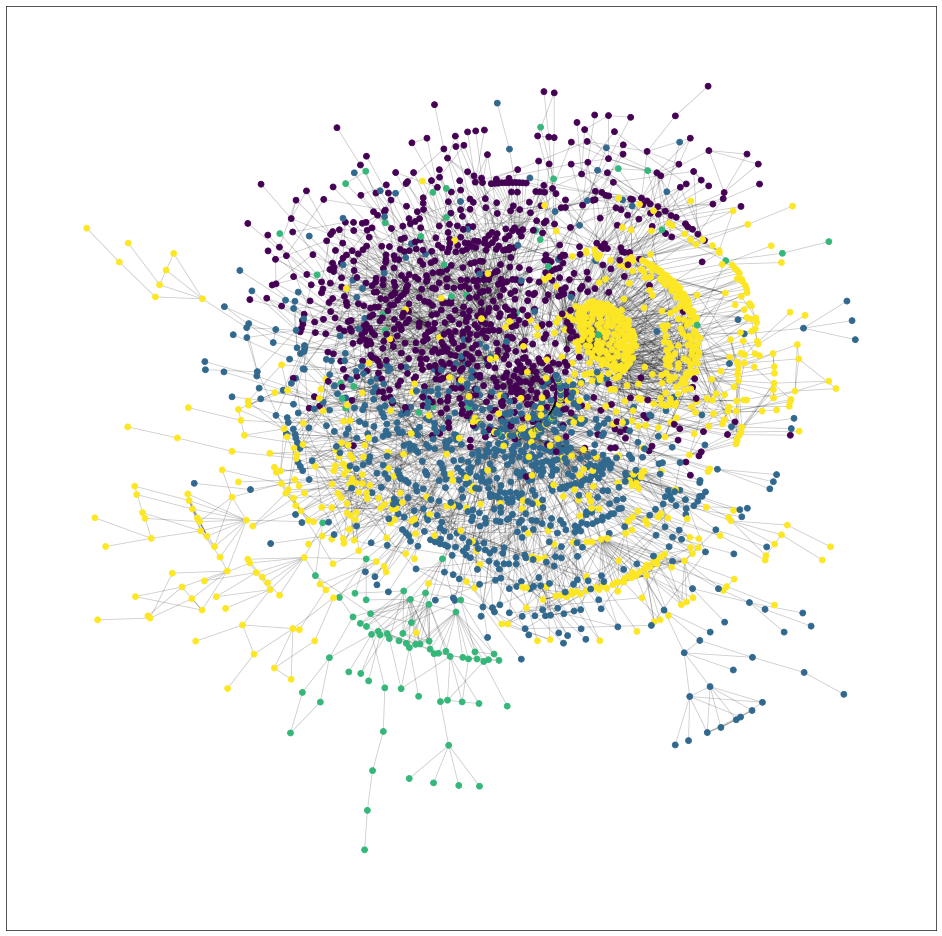

In [79]:
def plot_graph(G, clusters):
    fig = plt.figure(1, figsize=(20, 20), dpi=60)
    with open('data/cora/cora.layout.pkl', 'rb') as f:
        layout = pickle.load(f)
    #layout = nx.kamada_kawai_layout(G)
    nx.draw_networkx_edges(G, layout, alpha = 0.2)
    nx.draw_networkx_nodes(G, layout, node_color=clusters, node_size=50)

gcn_ = gcn.eval()
y_pred = gcn_(X)
max_y_pred = np.argmax(y_pred.detach().numpy(), axis=1)
plot_graph(G, max_y_pred)

### Task 4.2.2 (4 points)

a) <span style='color: green'>**\[Motivate\]**</span> What are advantages and disadvantages of using a modularity-based GNN instead of spectral clustering?   

*******************
<span style="color:red">**YOUR ANSWER HERE**</span> <br>
Modularity GNN:
- Pro: Directly targets modularity maximization, easily incorporates node features (like word attributes) for more context.
- Con: Can get stuck in suboptimal solutions (local optima), avoiding that requires substantial training time.

Spectral Clustering:
- Pro: good at capturing global graph structure, simpler setup without complex training loops.
- Con: Doesn't directly optimize modularity, difficult to integrate node features beyond initial graph construction, eigenvector computation can be slow for large graphs.
******************

b) <span style='color: green'>**\[Motivate\]**</span> Why do we need to regularize the objective using $l\|C\|_2$

*******************
<span style="color:red">**YOUR ANSWER HERE**</span> <br>
The loss function is $-Tr(C^T B C) + l * ||C||_2$. We minimize this loss.  
The l * ||C||_2 term adds a penalty based on the magnitude of the community assignment matrix C.
This penalty prevents the model from making the values in C excessively large just to maximize the modularity term, which could lead to numerical instability or trivial solutions. It encourages smoother, more stable community assignments.
******************